Ce fichier servira a importer les données des tableurs excel

In [10]:
import pandas as pd
import numpy as np
import pywt
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pycwt

Importation des données brutes

In [11]:
brut_data_filepath="..\Data\data_brut.xlsx"

brut_df=pd.read_excel(brut_data_filepath) #On convertit le fichier excel en DataFrame

Mise en forme de dictionnaire des données brutes

In [12]:
nb_lignes_brut=len(brut_df.index)   #nombre de lignes du tableur excel/DataFrame

nb_colonnes_brut=len(brut_df.columns)   #nombre de colonnes du tableur excel/DataFrame

brut_dict={}    #on initialise un dictionnaire vide

for i in range(0,nb_lignes_brut):   #on parcourt les lignes 
    key=brut_df.iloc[i,0]          #on associe key au libellé de la ligne

    if key not in brut_dict:        #s'il n'existe pas de key correspondant au libellé
        brut_dict[key]=[]           #on initialise la clé avec une liste vide

    for j in range(1,nb_colonnes_brut):             #on parcourt les colonnes de la ligne i
        brut_dict[key].append(brut_df.iloc[i, j])   #on ajoute chaque valeur à la liste vide précédemment crée


Importation des données CVS-CJO

In [13]:
cvs_cjo_data_filepath="..\Data\CVS_CJO_data.xlsx"

cvs_cjo_df=pd.read_excel(cvs_cjo_data_filepath) #On convertit le fichier excel en DataFrame

Mise en forme de dictionnaire des données CVS_CJO

In [14]:
nb_lignes_cvs_cjo=len(cvs_cjo_df.index)   #nombre de lignes du tableur excel/DataFrame

nb_colonnes_cvs_cjo=len(cvs_cjo_df.columns)   #nombre de colonnes du tableur excel/DataFrame

cvs_cjo_dict={}    #on initialise un dictionnaire vide

for i in range(0,nb_lignes_cvs_cjo):   #on parcourt les lignes 
    key=cvs_cjo_df.iloc[i,0]          #on associe key au libellé de la ligne

    if key not in cvs_cjo_dict:        #s'il n'existe pas de key correspondant au libellé
        cvs_cjo_dict[key]=[]           #on initialise la clé avec une liste vide

    for j in range(1,nb_colonnes_cvs_cjo):             #on parcourt les colonnes de la ligne i
        cvs_cjo_dict[key].append(cvs_cjo_df.iloc[i,j])   #on ajoute chaque valeur à la liste vide précédemment crée

#print(cvs_cjo_dict["Indice CVS-CJO de la production industrielle (base 100 en 2015) - Extraction d\'hydrocarbures (NAF rév. 2, niveau division, poste 06)"])   #test

Liste des ondelettes discretes

In [15]:
print(pywt.wavelist(kind='discrete'))

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8', 'sym9', 'sym10', 'sym11', 'sym12', 'sym13', 'sym14', 'sym15', 'sym16', 'sym17', 'sym18', 'sym19', 'sym20']


Décomposition d'une série een coefficients d'ondelette

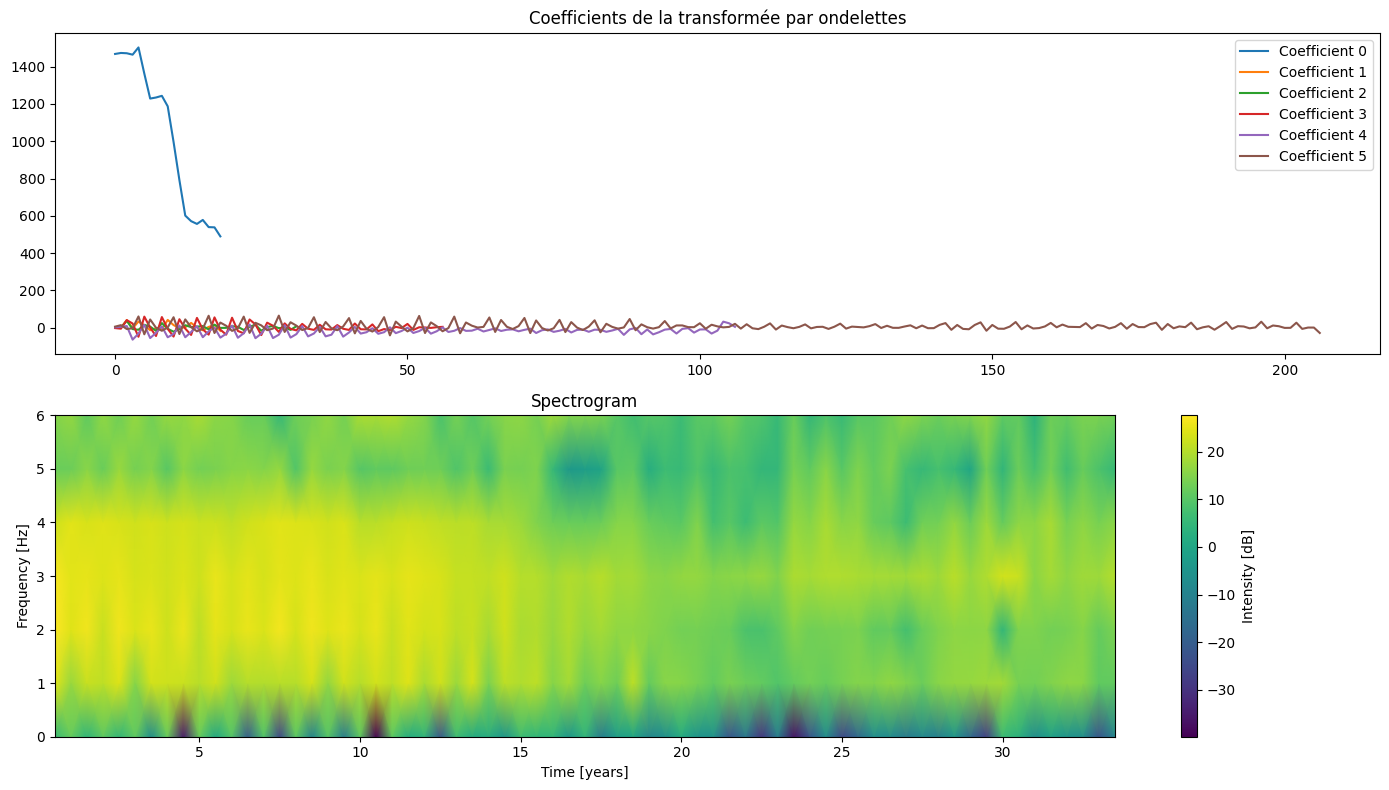

In [16]:

data = brut_dict["Indice brut de la production industrielle (base 100 en 2015) - Fabrication de textiles (NAF rév. 2, niveau division, poste 13)"] #choisir la série statistique
data = np.array(data)


# Appliquer la transformée par ondelettes
wavelet = 'db4'  #ondelette de Daubechies, de db1 à db38 en fonction de la précision souhaitée
coeffs = pywt.wavedec(data, wavelet)

# Affichage des coefficients de la transformée par ondelettes
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
for i, coeff in enumerate(coeffs):
    plt.plot(coeff, label=f'Coefficient {i}')
plt.legend()
plt.title('Coefficients de la transformée par ondelettes')

# Paramètres du spectrogramme
fs = 12  # Fréquence d'échantillonnage (12 points par an)
nperseg = 12  # Nombre de points par segment (12 mois = 1 an)
noverlap = 6  # Chevauchement de 6 points (6 mois)

# Calculer et afficher le spectrogramme
plt.subplot(2, 1, 2)
frequencies, times, Sxx = spectrogram(data, fs=fs, nperseg=nperseg, noverlap=noverlap)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [years]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')

plt.tight_layout()
plt.show()


Les couleurs représentent la puissance ou l'amplitude des fréquences. Les couleurs plus claires (jaune, vert clair) indiquent une plus grande amplitude.

Les coefficients suivants (1 à 8) sont les détails des différents niveaux de décomposition. Ils capturent les fluctuations et les variations rapides dans le signal.

Plus le numéro du coefficient est élevé, plus le détail capturé est fin et spécifique à des variations de haute fréquence dans le signal.

Cross wavelet transform (XWT)

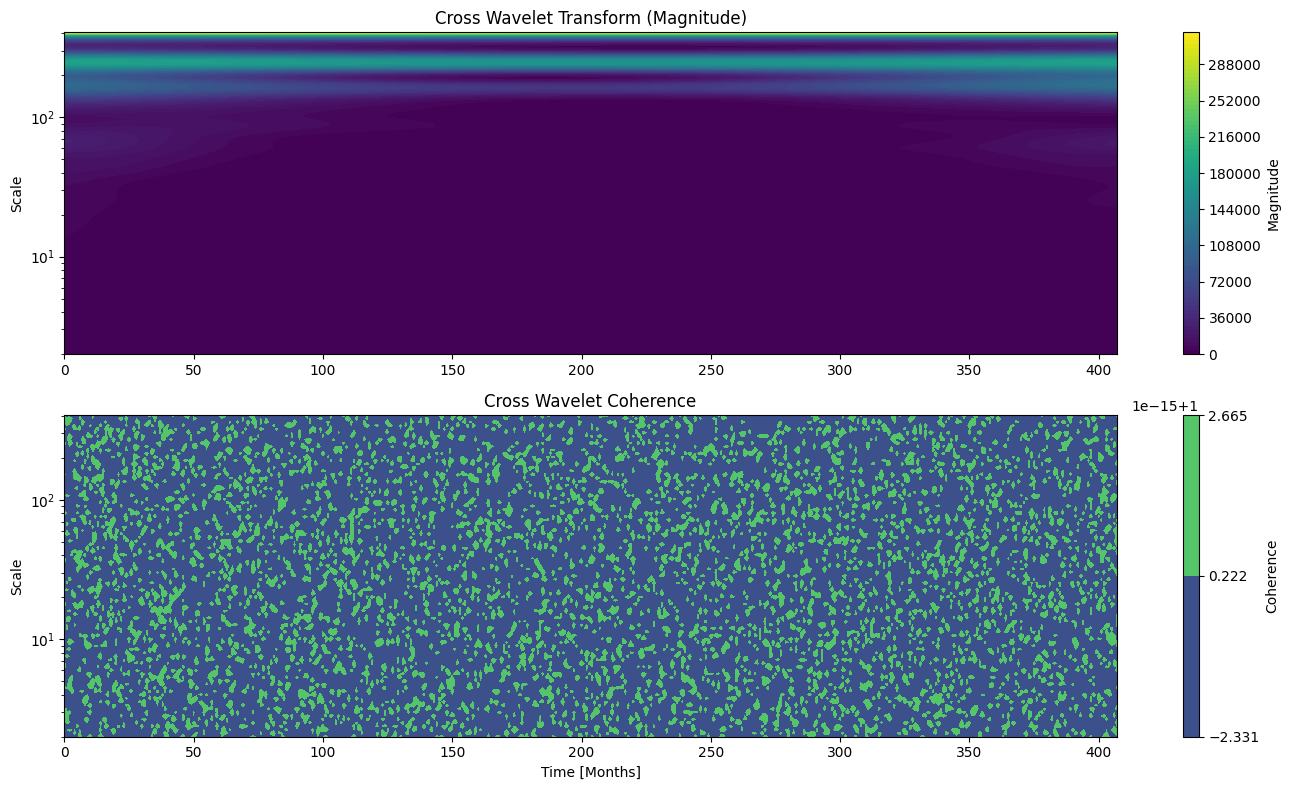

In [35]:
data1=cvs_cjo_dict["Indice CVS-CJO de la production industrielle (base 100 en 2015) - Fabrication d\'autres produits minéraux non métalliques (NAF rév. 2, niveau division, poste 23)"]
data2=cvs_cjo_dict["Indice CVS-CJO de la production industrielle (base 100 en 2015) - Fabrication de produits métalliques, à l\'exception des machines et des équipements (NAF rév. 2, niveau division, poste 25)"]

dt=1

mother=pycwt.Morlet(6)
s0=2*dt
dj=1/12

# Transformées par ondelettes
Wdata1, scales, freqs, coi, fft, fftfreqs = pycwt.cwt(data1, dt, dj , s0, -1, mother)
Wdata2, _, _, _, _, _= pycwt.cwt(data2, dt, dj ,s0, -1, mother)

W1x2=Wdata1*np.conjugate(Wdata2)

# Calculer la cohérence
S1 = np.abs(Wdata1)**2
S2 = np.abs(Wdata2)**2
Wxy_abs = np.abs(W1x2)
coherence = Wxy_abs**2 / (S1 * S2)

# Utiliser les indices de points de données pour l'affichage
months = np.arange(len(data1))

# Visualisation des résultats
plt.figure(figsize=(14, 8))

# Magnitude de la XWT
plt.subplot(2, 1, 1)
plt.contourf(months, scales, Wxy_abs, levels=100, cmap='viridis')
plt.yscale('log')
plt.colorbar(label='Magnitude')
plt.ylabel('Scale')
plt.title('Cross Wavelet Transform (Magnitude)')

# Coherence
plt.subplot(2, 1, 2)
plt.contourf(months, scales, coherence, levels=100, cmap='viridis')
plt.yscale('log')
plt.colorbar(label='Coherence')
plt.ylabel('Scale')
plt.xlabel('Time [Months]')
plt.title('Cross Wavelet Coherence')

plt.tight_layout()
plt.show()